In [1]:
import numpy as np
import pandas as pd
data = pd.read_csv('pdb_data_seq.csv')
data.head()


,structureId,chainId,sequence,residueCount,macromoleculeType
0,100D,A,CCGGCGCCGG,20,DNA/RNA Hybrid
1,100D,B,CCGGCGCCGG,20,DNA/RNA Hybrid
2,101D,A,CGCGAATTCGCG,24,DNA
3,101D,B,CGCGAATTCGCG,24,DNA
4,101M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein


In [2]:
data = data.dropna()
print(data.shape)
print(data.isnull().sum())
data = data.values

(432474, 5)
structureId          0
chainId              0
sequence             0
residueCount         0
macromoleculeType    0
dtype: int64


In [3]:
new_data = []
for i in range(len(data)):
    if data[i][4] == '':
        continue
    elif data[i][4] == 'DNA' or data[i][4]== 'Protein'or data[i][4] == 'RNA':
        new_data.append([data[i][2],data[i][4]])
    else:
        new_data.append([data[i][2],'Hybrid'])
        
new_data = np.array(new_data)
new_data.shape


(432474, 2)

In [4]:
data = pd.DataFrame(new_data, columns=['sequence', 'type'])
data.head(5)

,sequence,type
0,CCGGCGCCGG,Hybrid
1,CCGGCGCCGG,Hybrid
2,CGCGAATTCGCG,DNA
3,CGCGAATTCGCG,DNA
4,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,Protein


In [5]:
from sklearn.preprocessing import LabelBinarizer

# Transform labels to one-hot
lb = LabelBinarizer()
Y = lb.fit_transform(data.type)

In [6]:
from gensim.models import Word2Vec
new_model = Word2Vec.load('model.bin')
print(new_model)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


Word2Vec(vocab=9414, size=300, alpha=0.025)


In [7]:
def featureVecMethod(words, model, num_features):
    # Pre-initialising empty numpy array for speed
    featureVec = np.zeros(num_features,dtype="float32")
    nwords = 0
    
    #Converting Index2Word which is a list to a set for better speed in the execution.
    index2word_set = set(model.wv.index2word)
    
    for word in  words:
        if word in index2word_set:
            nwords = nwords + 1
            featureVec = np.add(featureVec,model[word])
    
    # Dividing the result by number of words to get average
    featureVec = np.divide(featureVec, nwords)
    return featureVec

def getAvgFeatureVecs(sequence, model, num_features):
    counter = 0
    SeqFeatureVecs = np.zeros((len(sequence),num_features),dtype="float32")
    for seq in sequence:

        if counter%1000 == 0:
            print("Sequence %d of %d"%(counter,len(sequence)))
            
        SeqFeatureVecs[counter] = featureVecMethod(seq, model, num_features)
        counter = counter+1
        
    return SeqFeatureVecs

In [8]:
raw_data = []
raw_label = []
for a in data.values:
    b = []
    tmp = a[0]
    tmp_lab = a[1]
    for i in range(0, len(tmp), 3):
        b.append(tmp[i:i+3])
    raw_data.append(b)
    raw_label.append(tmp_lab)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(raw_data, Y, test_size=.2)

In [14]:
len(y_train)

345979

In [15]:
X_train = getAvgFeatureVecs(X_train, new_model, 300)
X_test = getAvgFeatureVecs(X_test, new_model, 300)

Sequence 0 of 345979


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':


Sequence 1000 of 345979
Sequence 2000 of 345979
Sequence 3000 of 345979
Sequence 4000 of 345979
Sequence 5000 of 345979
Sequence 6000 of 345979
Sequence 7000 of 345979
Sequence 8000 of 345979
Sequence 9000 of 345979
Sequence 10000 of 345979
Sequence 11000 of 345979
Sequence 12000 of 345979
Sequence 13000 of 345979
Sequence 14000 of 345979
Sequence 15000 of 345979
Sequence 16000 of 345979
Sequence 17000 of 345979
Sequence 18000 of 345979
Sequence 19000 of 345979
Sequence 20000 of 345979
Sequence 21000 of 345979
Sequence 22000 of 345979
Sequence 23000 of 345979
Sequence 24000 of 345979
Sequence 25000 of 345979
Sequence 26000 of 345979
Sequence 27000 of 345979
Sequence 28000 of 345979
Sequence 29000 of 345979
Sequence 30000 of 345979
Sequence 31000 of 345979
Sequence 32000 of 345979
Sequence 33000 of 345979
Sequence 34000 of 345979
Sequence 35000 of 345979
Sequence 36000 of 345979
Sequence 37000 of 345979
Sequence 38000 of 345979
Sequence 39000 of 345979
Sequence 40000 of 345979
Sequence 

Sequence 321000 of 345979
Sequence 322000 of 345979
Sequence 323000 of 345979
Sequence 324000 of 345979
Sequence 325000 of 345979
Sequence 326000 of 345979
Sequence 327000 of 345979
Sequence 328000 of 345979
Sequence 329000 of 345979
Sequence 330000 of 345979
Sequence 331000 of 345979
Sequence 332000 of 345979
Sequence 333000 of 345979
Sequence 334000 of 345979
Sequence 335000 of 345979
Sequence 336000 of 345979
Sequence 337000 of 345979
Sequence 338000 of 345979
Sequence 339000 of 345979
Sequence 340000 of 345979
Sequence 341000 of 345979
Sequence 342000 of 345979
Sequence 343000 of 345979
Sequence 344000 of 345979
Sequence 345000 of 345979
Sequence 0 of 86495
Sequence 1000 of 86495
Sequence 2000 of 86495
Sequence 3000 of 86495
Sequence 4000 of 86495
Sequence 5000 of 86495
Sequence 6000 of 86495
Sequence 7000 of 86495
Sequence 8000 of 86495
Sequence 9000 of 86495
Sequence 10000 of 86495
Sequence 11000 of 86495
Sequence 12000 of 86495
Sequence 13000 of 86495
Sequence 14000 of 86495
Seq

In [21]:
from keras.models import Sequential
from keras.layers.recurrent import LSTM, GRU
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.embeddings import Embedding
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

from keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D

model = Sequential()

model.add(Dense(500, input_dim=300, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Dense(300, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Dense(4))
model.add(Activation('softmax'))

# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 500)               150500    
_________________________________________________________________
dropout_5 (Dropout)          (None, 500)               0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 500)               2000      
_________________________________________________________________
dense_8 (Dense)              (None, 500)               250500    
_________________________________________________________________
dropout_6 (Dropout)          (None, 500)               0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 500)               2000      
_________________________________________________________________
dense_9 (Dense)              (None, 300)               150300    
__________

In [22]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=128)

Train on 345979 samples, validate on 86495 samples
Epoch 1/20
345979/345979 [==============================] - 38s 110us/step - loss: 0.2691 - acc: 0.9122 - val_loss: 0.1639 - val_acc: 0.9434
Epoch 2/20
345979/345979 [==============================] - 30s 87us/step - loss: 0.1667 - acc: 0.9438 - val_loss: 0.1469 - val_acc: 0.9491
Epoch 3/20
345979/345979 [==============================] - 30s 87us/step - loss: 0.1470 - acc: 0.9499 - val_loss: 0.1257 - val_acc: 0.9547
Epoch 4/20
345979/345979 [==============================] - 30s 88us/step - loss: 0.1335 - acc: 0.9535 - val_loss: 0.1264 - val_acc: 0.9542
Epoch 5/20
345979/345979 [==============================] - 30s 87us/step - loss: 0.1244 - acc: 0.9563 - val_loss: 0.1208 - val_acc: 0.9562
Epoch 6/20
345979/345979 [==============================] - 30s 87us/step - loss: 0.1180 - acc: 0.9582 - val_loss: 0.1103 - val_acc: 0.9599
Epoch 7/20
345979/345979 [==============================] - 30s 87us/step - loss: 0.1129 - acc: 0.9606 - val

In [23]:
%matplotlib inline
import matplotlib as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import itertools

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
print("Training - Accuracy = " + str(accuracy_score(np.argmax(y_train, axis=1), np.argmax(train_pred, axis=1))*100))
print("Test - Accuracy = " + str(accuracy_score(np.argmax(y_test, axis=1), np.argmax(test_pred, axis=1))*100))


Training - Accuracy = 97.3761413264967
Test - Accuracy = 96.73044684663853


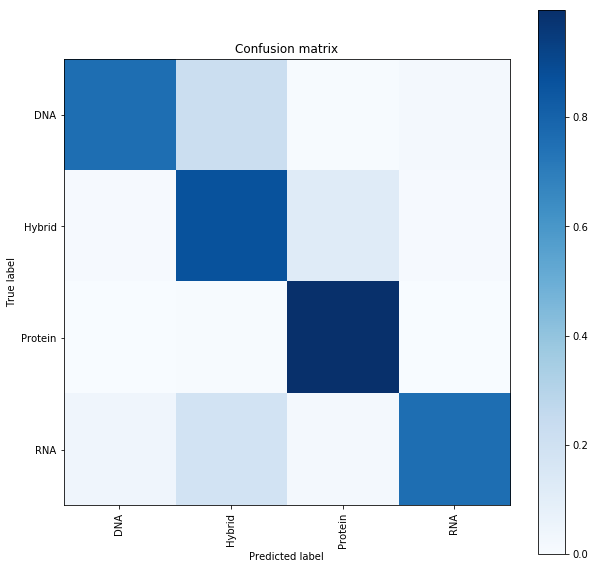

              precision    recall  f1-score   support

         DNA       0.79      0.76      0.77       783
      Hybrid       0.96      0.86      0.91     16194
     Protein       0.97      1.00      0.98     69069
         RNA       0.71      0.76      0.73       449

   micro avg       0.97      0.97      0.97     86495
   macro avg       0.86      0.84      0.85     86495
weighted avg       0.97      0.97      0.97     86495



In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
# Compute confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(test_pred, axis=1))

# Plot normalized confusion matrix
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
np.set_printoptions(precision=2)
plt.figure(figsize=(10,10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(lb.classes_))
plt.xticks(tick_marks, lb.classes_, rotation=90)
plt.yticks(tick_marks, lb.classes_)
#for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#    plt.text(j, i, format(cm[i, j], '.2f'), horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2. else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print(classification_report(np.argmax(y_test, axis=1), np.argmax(test_pred, axis=1), target_names=lb.classes_))

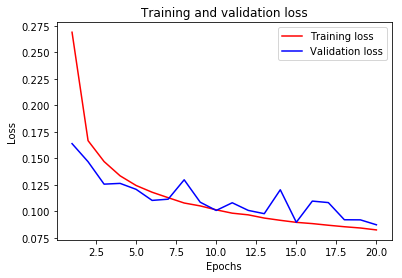

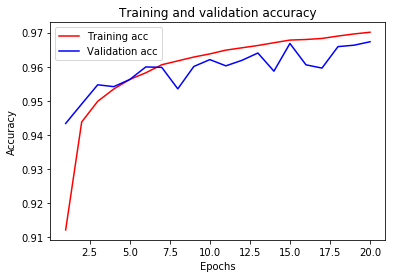

In [25]:
history_dict = history.history
history_dict.keys()

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.clf()   # clear figure

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [49]:
embedding_matrix = np.zeros((9415, 300))

In [50]:
for seq, i in tqdm(word_index.items()):
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

(9415, 300)

In [55]:
words = []
for i in raw_data:
    for j in i:
        if j not in words:
            words.append(j)
len(words)

9411